In [2]:
# 加入常用数学建模库，绘图忽视警告，以及添加对中文的支持
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 导入seaborn库用于高级绘图
import warnings

# 忽略所有警告
warnings.filterwarnings('ignore')

# 设置中文显示 - 使用Noto Sans CJK字体
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK SC', 'Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 环境配置完成！")


✅ 环境配置完成！


In [3]:


# 读取附件1的数据（有多个sheet）

# 使用绝对路径
data_path = '/workspaces/data_jianmo/2020C-中小微企业信贷决策/数据/附件1：123家有信贷记录企业的相关数据.xlsx'

# 读取所有sheet
data = pd.read_excel(data_path, sheet_name=None)

# 查看有哪些sheet
sheet_names = list(data.keys())
print(f"Sheet名称: {sheet_names}")
print(f"共有 {len(sheet_names)} 个sheet\n")


# 如果需要单独访问，可以这样：
if len(sheet_names) >= 1:
    df_qiyexinxi = data[sheet_names[0]]
if len(sheet_names) >= 2:
    df_jinxiang = data[sheet_names[1]]
if len(sheet_names) >= 3:
    df_xiaoxiang = data[sheet_names[2]]


Sheet名称: ['企业信息', '进项发票信息', '销项发票信息']
共有 3 个sheet



In [4]:
print(df_qiyexinxi.head())
print(df_jinxiang.head())
print(df_xiaoxiang.head())

  企业代号                 企业名称 信誉评级 是否违约
0   E1          ***电器销售有限公司    A    否
1   E2          ***技术有限责任公司    A    否
2   E3  ***电子(中国)有限公司***分公司    C    否
3   E4          ***发展有限责任公司    C    否
4   E5         ***供应链管理有限公司    B    否
  企业代号     发票号码       开票日期  销方单位代号       金额      税额     价税合计  发票状态
0   E1  3390939 2017-07-18  A00297  -943.40  -56.60 -1000.00  有效发票
1   E1  3390940 2017-07-18  A00297 -4780.24 -286.81 -5067.05  有效发票
2   E1  3390941 2017-07-18  A00297   943.40   56.60  1000.00  有效发票
3   E1  3390942 2017-07-18  A00297  4780.24  286.81  5067.05  有效发票
4   E1  9902669 2017-08-07  A05061   326.21    9.79   336.00  有效发票
  企业代号      发票号码       开票日期  购方单位代号       金额       税额     价税合计  发票状态
0   E1  11459356 2017-08-04  B03711  9401.71  1598.29  11000.0  有效发票
1   E1   5076239 2017-08-09  B00844  8170.94  1389.06   9560.0  有效发票
2   E1   5076240 2017-08-09  B00844  8170.94  1389.06   9560.0  有效发票
3   E1   5076241 2017-08-09  B00844  4085.47   694.53   4780.0  有效发票
4   E1   5076242 2017-08-

In [5]:
df_qiyexinxi.head()  # 显示企业信息表的前几行
df_qiyexinxi.describe()  # 显示企业信息表的统计描述

,企业代号,企业名称,信誉评级,是否违约
count,123,123,123,123
unique,123,93,4,2
top,E1,***建筑劳务有限公司,B,否
freq,1,7,38,96


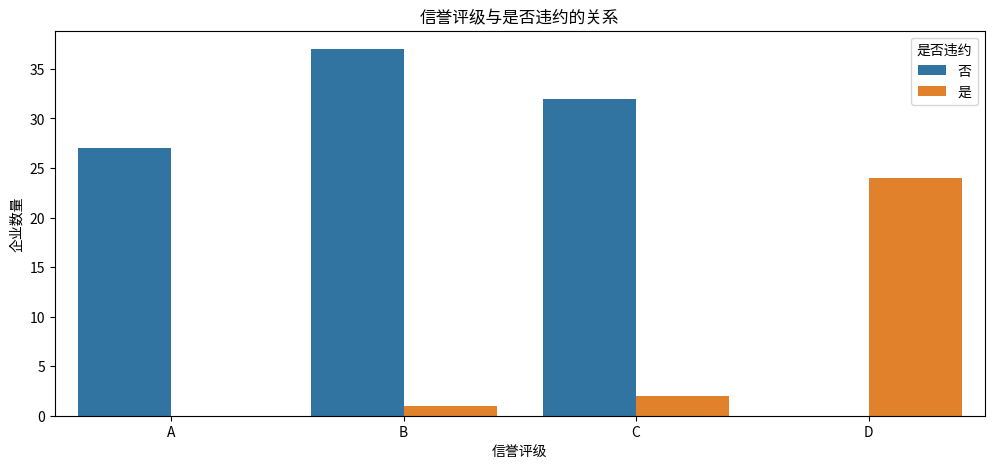

In [6]:
# 查看df_qiyexinxi中信誉评级和是否违约的分布情况，用中文显示

plt.figure(figsize=(12, 5))
# 设置x轴按字母顺序排列
sns.countplot(data=df_qiyexinxi, x='信誉评级', hue='是否违约', order=['A', 'B', 'C', 'D'])
plt.title('信誉评级与是否违约的关系')
plt.xlabel('信誉评级')
plt.ylabel('企业数量')
plt.legend(title='是否违约', loc='upper right')
plt.show()


可见评级越好越不容易违约

接下来关联df_jinxiang 和 df_qiyexinxi进行进一步分析。
用企业代号关联

In [7]:
df_jinxiang = df_jinxiang.merge(df_qiyexinxi[['企业代号', '是否违约']], on='企业代号', how='left')
df_xiaoxiang = df_xiaoxiang.merge(df_qiyexinxi[['企业代号', '是否违约']], on='企业代号', how='left')

In [8]:
df_xiaoxiang.head()  # 显示企业信息表的前几行

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,是否违约
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票,否
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,否
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,否
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,否
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,否


In [9]:
# 把df_jinxiang和df_xiaoxiang，union all成一个DataFrame，方便后续分析
df_combined = pd.concat([df_jinxiang, df_xiaoxiang], ignore_index=True)

df_combined['单位代号'] = df_combined['销方单位代号'].combine_first(df_combined['购方单位代号']) # 统一单位代号列
df_combined['购销状态'] = np.where(df_combined['购方单位代号'].notnull(), '购方', '销方')
df_combined.head()  # 显示合并后的前几行
# 删除不需要的列
df_combined.drop(columns=['销方单位代号', '购方单位代号'], inplace=True)
df_combined.head()  # 显示合并后的前几行

,企业代号,发票号码,开票日期,金额,税额,价税合计,发票状态,是否违约,单位代号,购销状态
0,E1,3390939,2017-07-18,-943.40,-56.60,-1000.00,有效发票,否,A00297,销方
1,E1,3390940,2017-07-18,-4780.24,-286.81,-5067.05,有效发票,否,A00297,销方
2,E1,3390941,2017-07-18,943.40,56.60,1000.00,有效发票,否,A00297,销方
3,E1,3390942,2017-07-18,4780.24,286.81,5067.05,有效发票,否,A00297,销方
4,E1,9902669,2017-08-07,326.21,9.79,336.00,有效发票,否,A05061,销方


In [10]:
# 处理负数金额
df_combined['发票绝对金额'] = df_combined['金额'].abs()
df_combined['发票类型'] = np.where(df_combined['金额'] > 0, 1, 0)  # 1表示正向发票，0表示负向发票
df_combined['税额绝对金额'] = df_combined['税额'].abs()
df_combined['税额类型'] = np.where(df_combined['税额'] > 0, 1, 0)  # 1表示正向发票，0表示负向发票
df_combined.drop(columns=['金额', '税额'], inplace=True)
df_combined.head()  # 显示处理后的前几行

,企业代号,发票号码,开票日期,价税合计,发票状态,是否违约,单位代号,购销状态,发票绝对金额,发票类型,税额绝对金额,税额类型
0,E1,3390939,2017-07-18,-1000.00,有效发票,否,A00297,销方,943.40,0,56.60,0
1,E1,3390940,2017-07-18,-5067.05,有效发票,否,A00297,销方,4780.24,0,286.81,0
2,E1,3390941,2017-07-18,1000.00,有效发票,否,A00297,销方,943.40,1,56.60,1
3,E1,3390942,2017-07-18,5067.05,有效发票,否,A00297,销方,4780.24,1,286.81,1
4,E1,9902669,2017-08-07,336.00,有效发票,否,A05061,销方,326.21,1,9.79,1


In [11]:
# 检查开票日期格式
df_combined['开票日期'] = pd.to_datetime(df_combined['开票日期'], errors='coerce')
print(df_combined['开票日期'].head())

0   2017-07-18
1   2017-07-18
2   2017-07-18
3   2017-07-18
4   2017-08-07
Name: 开票日期, dtype: datetime64[ns]


In [12]:
# df_combined['是否违约'].value_counts().plot(kind='bar', title='是否违约分布', xlabel='是否违约', ylabel='企业数量', color=['skyblue', 'salmon']) #显示数值
df_combined['是否违约'].value_counts()
# plt.show()

是否违约
否    362144
是     11287
Name: count, dtype: int64

In [13]:

27/(27+96)

0.21951219512195122

In [14]:
df_qiyexinxi['是否违约'].value_counts()  # 显示企业信息表的前几行

是否违约
否    96
是    27
Name: count, dtype: int64

违约公司发票占比很小，3%，但是在公司数量上占比在22%，这就说明大部分违约的公司的流水比较小？

然后看违约发票的公司占比

In [41]:
# --- 最终解决方案 ---

# 1. 清洗 “是否违约” 列 (您已经做过，但为了完整性再写一次)
df_combined['是否违约'] = df_combined['是否违约'].astype(str).str.strip()
mapping = {'是': 1, '1': 1, '否': 0, '0': 0}
df_combined['是否违约'] = df_combined['是否违约'].map(mapping)


# 2. (这是关键的新增步骤) 清洗 “发票状态” 列，去除首尾可能存在的空格
df_combined['发票状态'] = df_combined['发票状态'].str.strip()


# 3. 现在，再次运行您的检查代码，问题应该就解决了
print("--- 单独检查'是否违约'列 ---")
print(df_combined['是否违约'].value_counts())

print("\n--- 组合检查 ---")
print(df_combined[['是否违约', '发票状态']].value_counts())

--- 单独检查'是否违约'列 ---
是否违约
0    362144
1     11287
Name: count, dtype: int64

--- 组合检查 ---
是否违约  发票状态
0     有效发票    344058
      作废发票     18086
1     有效发票     10559
      作废发票       728
Name: count, dtype: int64


In [43]:
# 不违约的公司的作废发票的比例在5%，违约的在6.5%，区别不明显
print(18086/(18086+344058))
print(728/(10559+728))

0.04994145975081735
0.06449898112873217


In [45]:
# 第1步：按列分组
grouped = df_combined.groupby(['是否违约', '发票状态'])

# 第2步：对每个分组进行计数 (这里用 .size() 更合适)
counts = grouped.size()

# 第3步：手动按计数值进行降序排序
result = counts.sort_values(ascending=False)
result

是否违约  发票状态
0     有效发票    344058
      作废发票     18086
1     有效发票     10559
      作废发票       728
dtype: int64

In [58]:
df_combined['价税合计'] = df_combined['价税合计'].astype(float)
df_combined['价税合计'] 
df_combined[['是否违约', '发票状态', '价税合计']].groupby(['是否违约', '发票状态'])['价税合计'].sum()

是否违约  发票状态
0     作废发票    1.586679e+09
      有效发票    2.522483e+10
1     作废发票    1.821561e+07
      有效发票    2.400858e+08
Name: 价税合计, dtype: float64

In [52]:
# 按是否违约和发票状态分组，统计价税合计
summary = df_combined.groupby(['是否违约', '发票状态']).agg({
    '价税合计': ['sum', 'mean', 'count'],
    '发票绝对金额': ['sum', 'mean'],
    '税额绝对金额': ['sum', 'mean']
})

print(summary)

                   价税合计                              发票绝对金额                \
                    sum          mean   count           sum          mean   
是否违约 发票状态                                                                   
0    作废发票  1.586679e+09  87729.680917   18086  1.432300e+09  79193.826278   
     有效发票  2.522483e+10  73315.626433  344058  2.461824e+10  71552.595175   
1    作废发票  1.821561e+07  25021.445989     728  1.639959e+07  22526.911992   
     有效发票  2.400858e+08  22737.547325   10559  2.240923e+08  21222.867033   

                 税额绝对金额               
                    sum         mean  
是否违约 发票状态                             
0    作废发票  1.714875e+08  9481.780644  
     有效发票  3.296302e+09  9580.656771  
1    作废发票  2.060461e+06  2830.303118  
     有效发票  2.513713e+07  2380.635475  


In [60]:
# 做一个简单的卡方检验 (Chi-squared test) 来验证这一点，它会告诉您“作废发票行为”和“是否违约”这两个变量之间是否存在显著的相关性。
from scipy.stats import chi2_contingency
# 创建一个列联表
contingency_table = pd.crosstab(df_combined['是否违约'], df_combined['发票状态'])
print("\n--- 列联表 ---")
print(contingency_table)
# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\n卡方统计量: {chi2}, p值: {p}")
if p < 0.05:
    print("结论: '作废发票行为' 与 '是否违约' 之间存在显著相关性 (拒绝原假设)") 
else:
    print("结论: '作废发票行为' 与 '是否违约' 之间不存在显著相关性 (无法拒绝原假设)")


--- 列联表 ---
发票状态   作废发票    有效发票
是否违约               
0     18086  344058
1       728   10559

卡方统计量: 48.18086314806598, p值: 3.886630499235356e-12
结论: '作废发票行为' 与 '是否违约' 之间存在显著相关性 (拒绝原假设)


In [62]:
# 推荐的实践方法：使用树模型进行特征重要性排序

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 准备数据
features = ['发票状态', '发票类型', '税额类型', '价税合计', '发票绝对金额', '税额绝对金额']
X = df_combined[features]
y = df_combined['是否违约'] # 目标变量  
# 处理分类变量

for col in features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 训练随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# 获取特征重要性
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print("\n--- 特征重要性排序 ---")
print(feature_importance)   



--- 特征重要性排序 ---
发票绝对金额    0.350551
价税合计      0.332278
税额绝对金额    0.312981
发票状态      0.002918
税额类型      0.000890
发票类型      0.000383
dtype: float64


In [63]:
# ============================================================
# 【重要】正确的分析方法：企业层面的特征工程
# ============================================================

# 第一步：准备企业层面的特征数据集（聚合）
print("=== 步骤1：创建企业层面的聚合特征 ===\n")

# 确保'价税合计'是数值，并且处理好红字发票（负数）
df_combined['发票绝对金额'] = df_combined['价税合计'].abs()
df_combined['是否作废'] = (df_combined['发票状态'] == '作废发票').astype(int)

# --- 核心聚合步骤 ---
# 定义我们想要计算的聚合统计量
aggregations = {
    '发票绝对金额': ['sum', 'mean', 'max', 'std'], # 交易规模和稳定性
    '发票号码': 'count',                         # 交易活跃度
    '是否作废': 'mean'                           # 风险行为
}

# 按企业代号进行分组聚合
df_companies = df_combined.groupby('企业代号').agg(aggregations).reset_index()

# 为了方便，我们给聚合后的列重命名
df_companies.columns = ['企业代号', '总交易额', '平均交易额', '最大单笔交易', '交易额波动', '发票总数', '作废发票比例']

# 处理聚合后可能产生的NaN值（例如，只有一个发票的公司，其交易额波动会是NaN）
df_companies = df_companies.fillna(0)

# --- 准备目标变量 y ---
# 我们需要每个企业的最终违约状态
company_status = df_combined.drop_duplicates(subset=['企业代号'])[['企业代号', '是否违约']]

# 将特征和目标变量合并成最终的建模用数据集
df_model_ready = pd.merge(df_companies, company_status, on='企业代号')

print("--- 准备好的、以企业为单位的数据集 ---")
print(f"数据集形状: {df_model_ready.shape}")
print(f"企业总数: {len(df_model_ready)}")
print(f"违约企业数: {df_model_ready['是否违约'].sum()}")
print(f"违约率: {df_model_ready['是否违约'].mean():.2%}\n")
print(df_model_ready.head(10))
print("\n")
print(df_model_ready.describe())

=== 步骤1：创建企业层面的聚合特征 ===

--- 准备好的、以企业为单位的数据集 ---
数据集形状: (123, 8)
企业总数: 123
违约企业数: 27
违约率: 21.95%

   企业代号          总交易额         平均交易额       最大单笔交易         交易额波动   发票总数  \
0    E1  1.314021e+10  1.137582e+06  11699934.00  2.540174e+06  11551   
1   E10  3.896752e+08  8.353167e+04   1029897.00  2.520610e+05   4665   
2  E100  9.916764e+05  6.316410e+03     93730.00  1.031266e+04    157   
3  E101  7.791234e+05  9.862322e+03     72852.25  9.062050e+03     79   
4  E102  4.280959e+06  4.719911e+03     64990.30  8.128552e+03    907   
5  E103  2.883581e+06  1.221856e+04    101915.76  2.572183e+04    236   
6  E104  4.112100e+05  1.869136e+04     60200.00  2.108367e+04     22   
7  E105  1.025481e+06  8.011574e+03     10395.00  3.236078e+03    128   
8  E106  7.658590e+05  4.052164e+03     11801.00  3.574281e+03    189   
9  E107  1.050410e+06  1.667317e+04    100000.00  2.889786e+04     63   

     作废发票比例  是否违约  
0  0.036014     0  
1  0.061951     0  
2  0.006369     1  
3  0.392405     1 


=== 步骤2：基于企业层面特征的建模 ===

特征矩阵形状: (123, 6)
目标变量分布:
是否违约
0    96
1    27
Name: count, dtype: int64

训练集大小: 86
测试集大小: 37
训练集违约率: 22.09%
测试集违约率: 21.62%


【企业层面】新的特征重要性排序
总交易额      0.264186
发票总数      0.221365
最大单笔交易    0.148365
交易额波动     0.136951
作废发票比例    0.126221
平均交易额     0.102912
dtype: float64




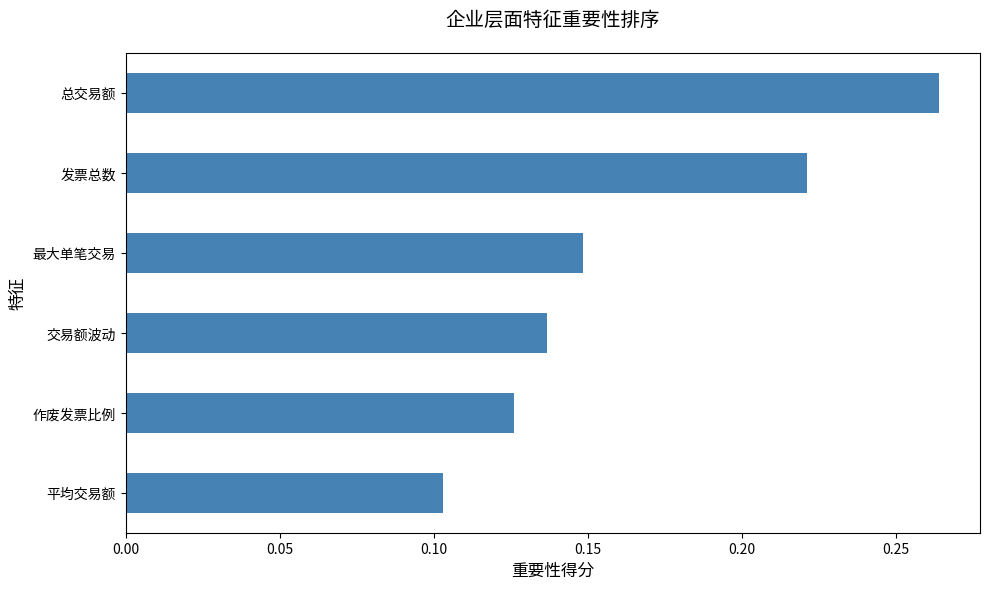


模型性能评估

混淆矩阵:
[[28  1]
 [ 3  5]]

分类报告:
              precision    recall  f1-score   support

         不违约       0.90      0.97      0.93        29
          违约       0.83      0.62      0.71         8

    accuracy                           0.89        37
   macro avg       0.87      0.80      0.82        37
weighted avg       0.89      0.89      0.89        37


ROC-AUC Score: 0.8362


In [64]:
# ============================================================
# 第二步：在正确的企业级数据集上进行建模
# ============================================================

print("\n=== 步骤2：基于企业层面特征的建模 ===\n")

# 准备新的 X 和 y
features = ['总交易额', '平均交易额', '最大单笔交易', '交易额波动', '发票总数', '作废发票比例']
X = df_model_ready[features]
y = df_model_ready['是否违约']

# 检查数据
print(f"特征矩阵形状: {X.shape}")
print(f"目标变量分布:\n{y.value_counts()}\n")

# 划分训练集和测试集
# stratify=y 确保训练集和测试集中违约率保持一致
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"训练集大小: {len(X_train)}")
print(f"测试集大小: {len(X_test)}")
print(f"训练集违约率: {y_train.mean():.2%}")
print(f"测试集违约率: {y_test.mean():.2%}\n")

# 训练随机森林模型 (这次是在正确的数据上！)
# class_weight='balanced' 处理类别不平衡问题
model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced',
    max_depth=10,  # 防止过拟合
    min_samples_split=5
)

model.fit(X_train, y_train)

# 获取并打印新的特征重要性
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

print("\n" + "="*60)
print("【企业层面】新的特征重要性排序")
print("="*60)
print(feature_importance)
print("\n")

# 可视化特征重要性
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='steelblue')
plt.title('企业层面特征重要性排序', fontsize=14, pad=20)
plt.xlabel('重要性得分', fontsize=12)
plt.ylabel('特征', fontsize=12)
plt.gca().invert_yaxis()  # 最重要的在顶部
plt.tight_layout()
plt.show()

# 评估模型性能
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\n" + "="*60)
print("模型性能评估")
print("="*60)
print("\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred))
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=['不违约', '违约']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

In [65]:
# ==============================================================================
# 层次一：使用5折交叉验证增强模型可靠性
# ==============================================================================
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 准备数据 (与您之前的代码相同)
features = ['总交易额', '平均交易额', '最大单笔交易', '交易额波动', '发票总数', '作废发票比例']
X = df_model_ready[features]
y = df_model_ready['是否违约']

# 初始化与您之前相同的随机森林模型
# class_weight='balanced' 在不平衡数据集上依然是个好习惯
model_rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced',
    max_depth=10,
    min_samples_split=5
)

# 设置5折分层交叉验证
# n_splits=5 表示分成5份数据
# shuffle=True 表示在划分前打乱数据顺序
# random_state=42 确保每次运行结果一致
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 定义我们关心的性能指标
scoring_metrics = ['roc_auc', 'recall', 'precision', 'accuracy']

print("--- 随机森林模型 5折交叉验证性能 ---")

# 循环计算每个指标
for metric in scoring_metrics:
    scores = cross_val_score(model_rf, X, y, cv=cv, scoring=metric)
    print(f"{metric.capitalize()} (平均值): {scores.mean():.4f}")
    print(f"{metric.capitalize()} (标准差): {scores.std():.4f}\n")

--- 随机森林模型 5折交叉验证性能 ---
Roc_auc (平均值): 0.8628
Roc_auc (标准差): 0.0502

Recall (平均值): 0.5133
Recall (标准差): 0.3124

Precision (平均值): 0.5629
Precision (标准差): 0.3275

Accuracy (平均值): 0.8290
Accuracy (标准差): 0.0315



In [66]:
# ==============================================================================
# 层次二：横向对比 - XGBoost 与 逻辑回归
# ==============================================================================
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- 1. XGBoost 模型 ---

# 计算 scale_pos_weight 来处理类别不平衡
# 比例 = (不违约样本数 / 违约样本数)
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

model_xgb = xgb.XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight # 关键参数
)

print("\n--- XGBoost 模型 5折交叉验证性能 ---")
for metric in scoring_metrics:
    scores = cross_val_score(model_xgb, X, y, cv=cv, scoring=metric)
    print(f"{metric.capitalize()} (平均值): {scores.mean():.4f}")
    print(f"{metric.capitalize()} (标准差): {scores.std():.4f}\n")


# --- 2. 逻辑回归模型 (带数据标准化) ---

# 创建一个管道(Pipeline)，将标准化和逻辑回归打包
# 这能确保在交叉验证的每一步中，只对训练数据进行标准化，避免数据泄露
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()), # 第一步：数据标准化
    ('logreg', LogisticRegression(random_state=42, class_weight='balanced')) # 第二步：逻辑回归
])

print("\n--- 逻辑回归模型 5折交叉验证性能 ---")
for metric in scoring_metrics:
    scores = cross_val_score(pipeline_lr, X, y, cv=cv, scoring=metric)
    print(f"{metric.capitalize()} (平均值): {scores.mean():.4f}")
    print(f"{metric.capitalize()} (标准差): {scores.std():.4f}\n")

# --- 3. (可选) 查看逻辑回归的系数以解释业务 ---
print("\n--- 逻辑回归模型特征系数解读 ---")
# 在整个数据集上训练一次管道以获取系数
pipeline_lr.fit(X, y)
# 从管道中提取逻辑回归模型
logreg_model = pipeline_lr.named_steps['logreg']
# 将系数与特征名对应起来
coeffs = pd.Series(logreg_model.coef_[0], index=features).sort_values()
print("特征系数 (值越大/越小，代表对违约概率的影响越大):")
print(coeffs)

ModuleNotFoundError: No module named 'xgboost'